In [58]:
pip install pydicom

In [59]:
!git clone https://github.com/siddhanttt2506/Brain-Spy.git

fatal: destination path 'Brain-Spy' already exists and is not an empty directory.


In [60]:
nifti_path = './Brain-Spy/Week 2/Sample_Data/sample_mri.nii.gz'


In [61]:
nifti_path = './Brain-Spy/Week\ 2/Sample_Data/sample_mri.nii.gz'


In [62]:
!ls -l

total 16
drwxr-xr-x 5 root root 4096 May 31 20:07 Brain-Spy
drwx------ 7 root root 4096 May 31 20:02 drive
drwxr-xr-x 2 root root 4096 May 31 20:18 output_dicom
drwxr-xr-x 1 root root 4096 May 29 14:01 sample_data


In [63]:
!ls -l Brain-Spy

total 8
drwxr-xr-x 2 root root 4096 May 31 20:05 'Week 1'
drwxr-xr-x 3 root root 4096 May 31 20:05  Week2


In [64]:
pip install SimpleITK

In [65]:
#Converting nii to dicom of the given dataset.(Couldn't find on the web).
import SimpleITK as sitk
import os

nifti_path = 'path_to_your/sample_mri.nii.gz'
output_dicom_dir = './output_dicom/'

os.makedirs(output_dicom_dir, exist_ok=True)

# Read NIfTI
image = sitk.ReadImage("/content/Brain-Spy/Week2/Sample Data/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii")

# Cast image to unsigned 16-bit integer type
image_int = sitk.Cast(image, sitk.sitkUInt16)

# Write DICOM slices
sitk.WriteImage(image_int, os.path.join(output_dicom_dir, 'dicom%03d.dcm'))

print(f"Converted NIfTI to DICOM : {output_dicom_dir}")


Converted NIfTI to DICOM : ./output_dicom/


In [66]:
# Cell 1: Imports
import nibabel as nib
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

try:
    import SimpleITK as sitk
    print("SimpleITK is available")
except ImportError:
    sitk = None
    print("SimpleITK is not installed")

SimpleITK is available


In [67]:
# Cell 2: Load NIfTI
nifti_path = '/content/Brain-Spy/Week2/Sample Data/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii'
nifti_img = nib.load(nifti_path)
nifti_data = nifti_img.get_fdata()
print("NIfTI shape:", nifti_data.shape)

NIfTI shape: (256, 362, 384)


In [68]:
# Cell 3: Load DICOM Series
import os
import pydicom
from glob import glob

dicom_folder = '/content/output_dicom/'
dicom_files = sorted(glob(os.path.join(dicom_folder, 'dicom*.dcm')))  # match dicom000.dcm, dicom001.dcm, etc.

dicom_slices = [pydicom.dcmread(f) for f in dicom_files]
print(f"Loaded {len(dicom_slices)} DICOM slices")

Loaded 1 DICOM slices


In [69]:
# Cell 4: NIfTI Metadata
print("Affine Matrix:\n", nifti_img.affine)
print("Header Info:\n", nifti_img.header)

Affine Matrix:
 [[ 6.29074156e-01 -1.33072212e-02 -3.11387163e-02 -7.36054077e+01]
 [ 1.63442213e-02  6.21981978e-01  5.91654330e-02 -1.00073349e+02]
 [ 2.99664345e-02 -5.98863661e-02  6.21413589e-01 -1.19990189e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Header Info:
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 256 362 384   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.63  0.625 0.625 6.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_dura

In [70]:
# Cell 5: DICOM Metadata
example_slice = dicom_slices[0]
print("Patient Name:", example_slice.PatientName)
print("Modality:", example_slice.Modality)
print("Study Date:", example_slice.StudyDate)
# print("Slice Thickness:", example_slice.SliceThickness)
# print("Image Position (Patient):", example_slice.ImagePositionPatient)

Patient Name: 
Modality: OT
Study Date: 20250531


In [71]:
volume_dicom = np.stack([s.pixel_array for s in dicom_slices], axis=0)
volume_dicom = volume_dicom.squeeze()  # removes any singleton dimensions

print("New shape:", volume_dicom.shape)

print("Volume dtype:", volume_dicom.dtype)

New shape: (384, 362, 256)
Volume dtype: uint16


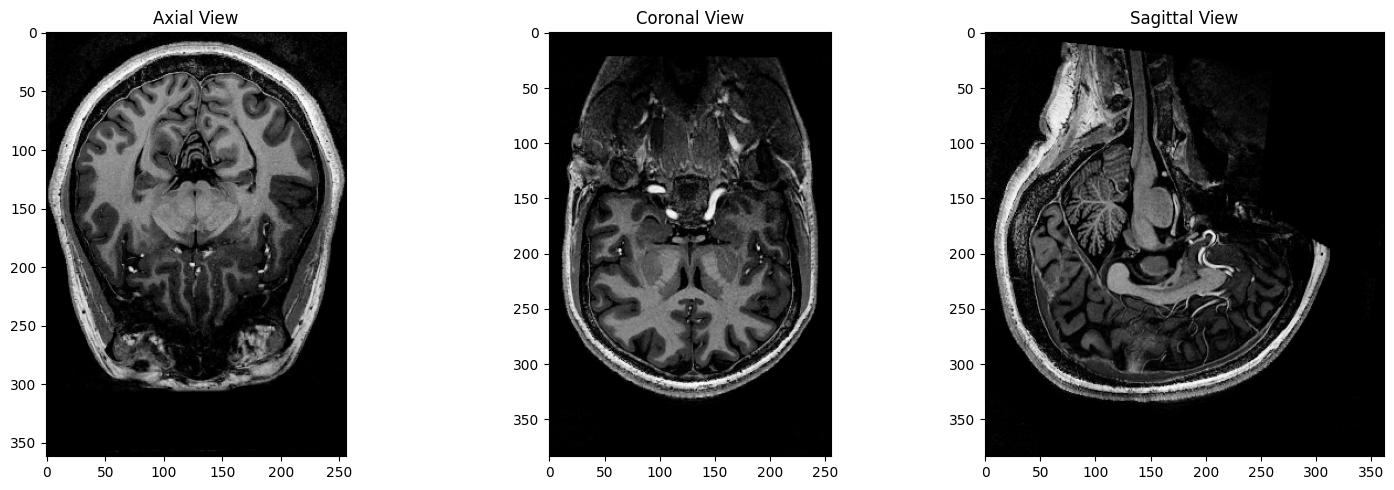

In [72]:
# Visualize anatomical planes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(volume_dicom[volume_dicom.shape[0] // 2], cmap='gray')
axes[0].set_title('Axial View')
axes[1].imshow(volume_dicom[:, volume_dicom.shape[1] // 2, :], cmap='gray')
axes[1].set_title('Coronal View')
axes[2].imshow(volume_dicom[:, :, volume_dicom.shape[2] // 2], cmap='gray')
axes[2].set_title('Sagittal View')
plt.tight_layout()
plt.show()

In [73]:
from nibabel.orientations import aff2axcodes
orient = aff2axcodes(nifti_img.affine)
print("NIfTI orientation:", orient)

NIfTI orientation: ('R', 'A', 'S')


- Use Case: DICOM is clinical; NIfTI is research-oriented.
- File Structure: DICOM = many files; NIfTI = single file.
- Metadata: DICOM is rich; NIfTI is minimal.
- Ease of Use: NIfTI is easier with nibabel.

